In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import regionprops, label
from copy import deepcopy
from simulation import *

## Load stored result of simulating 10,000 grid cells

In [2]:
fname = "/Users/danielacker/Desktop/place-field-synapse-turnover/grid_cells.npy"
grid_cells = np.load(fname)

## Generate random synaptic connections and weights

In [14]:
weight_grid = new_weight_grid()
connection_indecies = np.random.randint(0, 10000, (1200, 2000))

## Run simulations

In [15]:
# run simulations
results = simulate_with_n_scrambled(
    connection_indecies, 
    np.arange(0, 1260, 60), 
    weight_grid,
    grid_cells)

## Analyze correlations between 3d place fields

In [16]:
# evaluate correlations
field_correlations = []
for i in range(1, len(results)):
    corr = place_field_correlation(results[0], results[i])
    field_correlations.append(corr)

# evaluate cells remaining
starting_n = len(results[0]["place_cell_ids"])
preserved = np.array([len(x) for x in field_correlations]) / starting_n

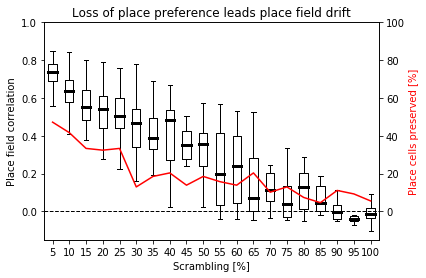

In [20]:
# plot correlations and cells remaining
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.axhline(0, linewidth=1, ls="--", color="black")

ax1.boxplot(
    field_correlations, 
    labels=np.arange(0, 105, 5)[1:],
    showfliers=False, 
    medianprops={"color":"black", "linewidth":3});
ax2.plot(range(1, 21), preserved*100, c="red")

ax1.set_xlabel("Scrambling [%]")
ax1.set_ylabel("Place field correlation")
ax2.set_ylabel("Place cells preserved [%]", color="red")

ax1.set_ylim(-0.15, 1)
ax2.set_ylim(-15, 100)

plt.title("Loss of place preference leads place field drift")

plt.show()

## Analyze 2d place field drift and loss

In [18]:
def plot_centered_on_result(results, idx, cmap="Greys"):
    ax1 = plt.subplot(151)
    linear = results[0]['place_cells_rates'][:, :100]
    linear = np.log1p(linear) > 0
    ax1.imshow(linear[idx,:], cmap=cmap)

    ax2 = plt.subplot(152)
    linear = results[1]['place_cells_rates'][:, :100]
    linear = np.log1p(linear) > 0
    ax2.imshow(linear[idx,:], cmap=cmap)

    ax3 = plt.subplot(153)
    linear = results[2]['place_cells_rates'][:, :100]
    linear = np.log1p(linear) > 0
    ax3.imshow(linear[idx,:], cmap=cmap)

    ax4 = plt.subplot(154)
    linear = results[3]['place_cells_rates'][:, :100]
    linear = np.log1p(linear) > 0
    ax4.imshow(linear[idx,:], cmap=cmap)

    ax5 = plt.subplot(155)
    linear = results[4]['place_cells_rates'][:, :100]
    linear = np.log1p(linear) > 0
    ax5.imshow(linear[idx,:], cmap=cmap)

    ax2.set_yticklabels([])
    ax3.set_yticklabels([])
    ax4.set_yticklabels([])
    ax5.set_yticklabels([])

    ax1.set_title("0%")
    ax2.set_title("5%")
    ax3.set_title("10%")
    ax4.set_title("15%")
    ax5.set_title("20%")

    ax2.set_yticks([])
    ax3.set_yticks([])
    ax4.set_yticks([])
    ax5.set_yticks([])

    ax1.set_ylabel("Cell number")
    ax3.set_xlabel("Position [cm]")

    plt.tight_layout()
    plt.show()

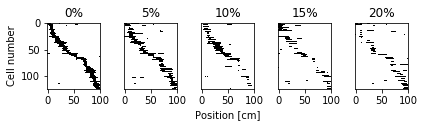

In [19]:
idx_0 = position_sorted_indecies(results, 0)

plot_centered_on_result(results, idx_0)